In [4]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [5]:
from historical_data import get_all_historical_data
import datetime as dt


In [6]:
currency = "BTCUSDT"
df = get_all_historical_data(currency,dt.datetime(2013,12,1))


In [7]:
df.shape

(30407, 7)

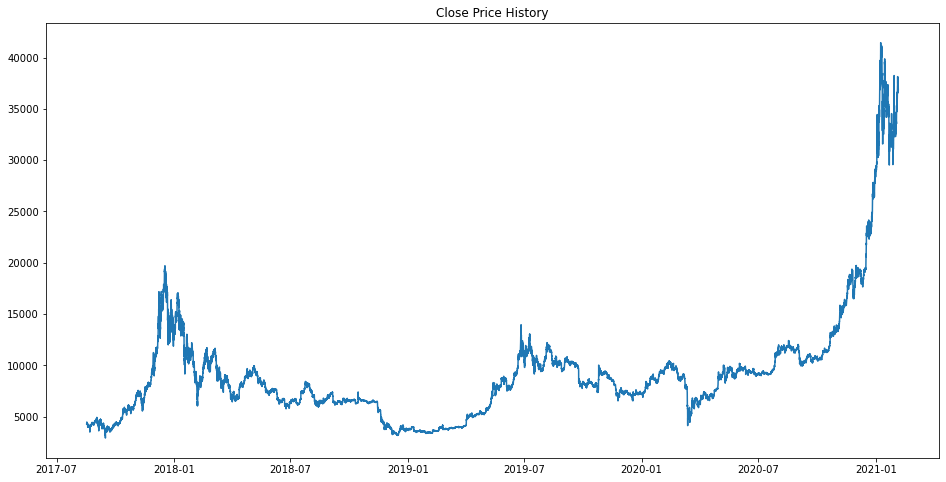

In [8]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot((df["close"]))


In [9]:
data = df.filter(["close"])

#convert dataframe to np array
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [11]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    # if i <= 60:
    #     print(x_train)
    #     print(y_train)

In [12]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(24266, 60, 1)

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [16]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

24266/24266 [==============================] - 123s 5ms/step - loss: 5.2546e-05


In [18]:
 test_data = scaled_data[training_data_len - 60: , :]

 x_test = []
 y_test = dataset[training_data_len: , :]

 for i in range(60, len(test_data)):
     x_test.append(test_data[i-60:i, 0])
 

In [31]:
x_test = np.array(x_test)


In [32]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [33]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [34]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

755.4773997574098

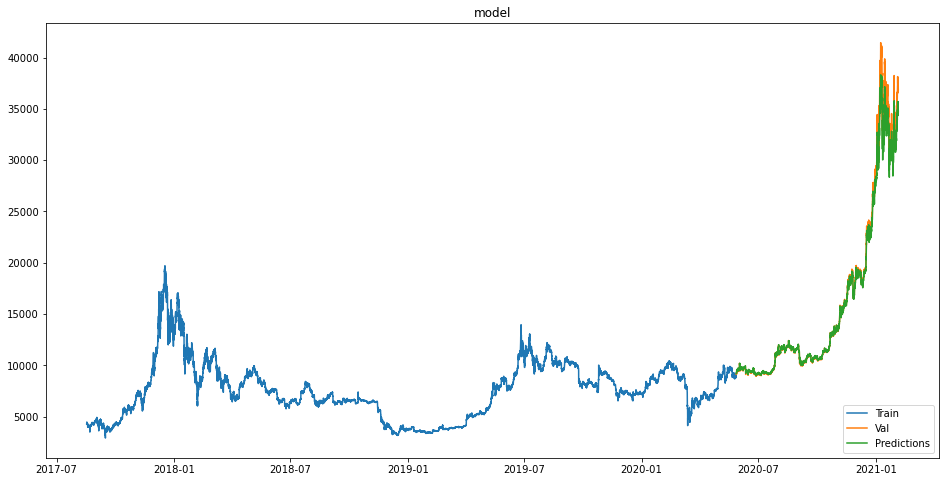

In [37]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
plt.figure(figsize=(16,8))
plt.title("M  odel")
plt.plot(train["close"])
plt.plot(valid[["close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()